In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
data=pd.read_table(r'/content/drive/My Drive/XYZCorp_LendingData.txt')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
data.shape

(855969, 73)

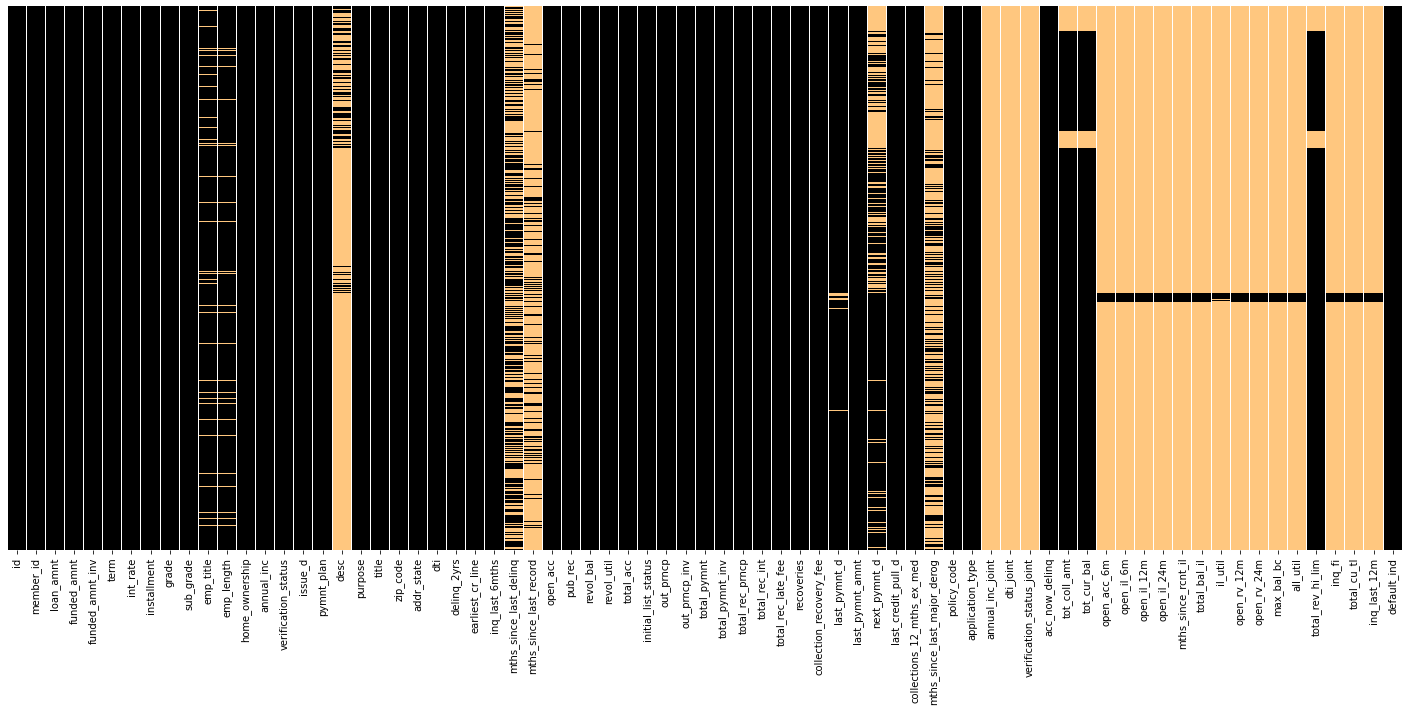

In [7]:
plt.figure(figsize=(25,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='copper')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution \n 0 : Non Defaulters       1 : Defaulters')

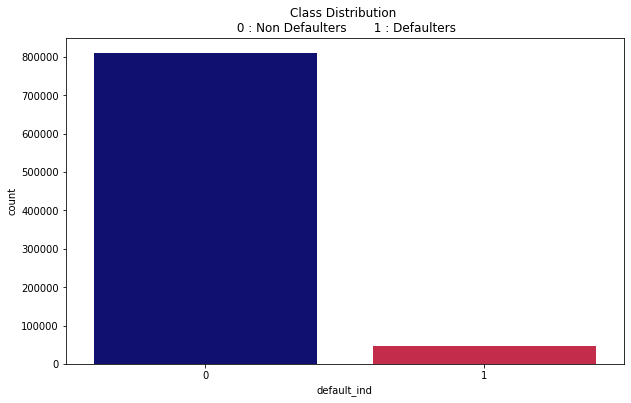

In [8]:
plt.figure(figsize=(10,6))
sns.countplot('default_ind', data=data,palette=["navy","crimson"])
plt.title('Class Distribution \n 0 : Non Defaulters       1 : Defaulters')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Funded Amount Distribution')

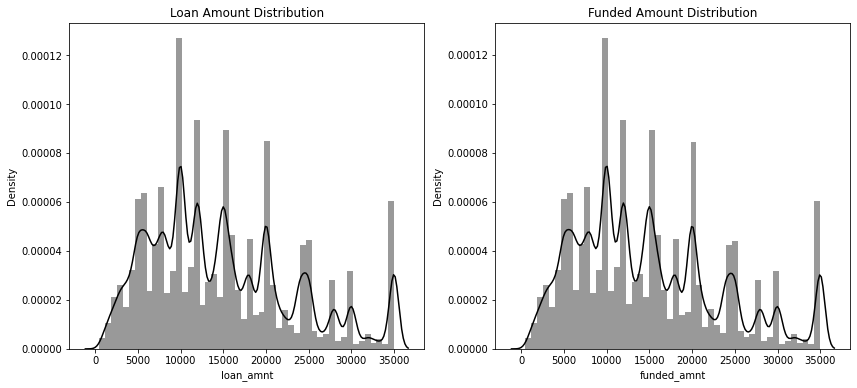

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))


sns.distplot(data['loan_amnt'], ax=ax[0],color="black")
ax[0].set_title("Loan Amount Distribution")

sns.distplot(data['funded_amnt'], ax=ax[1],color="black")
ax[1].set_title("Funded Amount Distribution")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

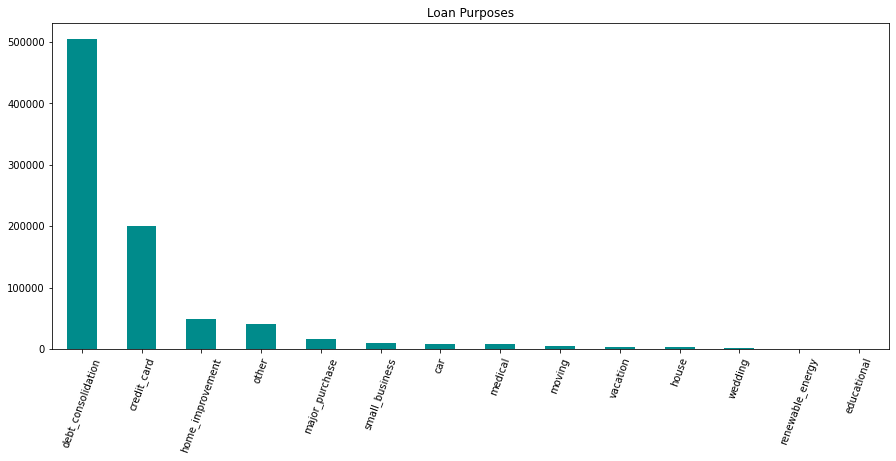

In [10]:
plt.figure(figsize=(15,6))

data.purpose.value_counts().plot(kind='bar',color="darkcyan").set_title('Loan Purposes')
plt.xticks(rotation=70)

In [11]:
?sns.distplot()

In [12]:
cat_var=[]
num_var=[]
for i in data.columns:
  if data[i].dtype=='object':
    cat_var.append(i)
  else:
    num_var.append(i)

In [13]:
data[cat_var].isnull().sum().sort_values()

term                              0
initial_list_status               0
earliest_cr_line                  0
addr_state                        0
zip_code                          0
application_type                  0
pymnt_plan                        0
purpose                           0
verification_status               0
home_ownership                    0
sub_grade                         0
grade                             0
issue_d                           0
title                            33
last_credit_pull_d               50
last_pymnt_d                   8862
emp_length                    43061
emp_title                     49443
next_pymnt_d                 252971
desc                         734157
verification_status_joint    855527
dtype: int64

In [14]:
miss_data=pd.DataFrame({'missing_val':(data[data.columns].isnull().sum()),
                   'percent':(data[data.columns].isnull().sum()*100/data.shape[0])})
miss_data.sort_values(by="percent")

,missing_val,percent
id,0,0.000000
earliest_cr_line,0,0.000000
inq_last_6mths,0,0.000000
open_acc,0,0.000000
pub_rec,0,0.000000
...,...,...
mths_since_rcnt_il,843035,98.488964
il_util,844360,98.643759
annual_inc_joint,855527,99.948363
verification_status_joint,855527,99.948363


In [15]:
temp_df=data.loc[(data['application_type']=='JOINT') ,['verification_status','verification_status_joint','annual_inc',"annual_inc_joint",'dti','dti_joint','default_ind']].reset_index()
temp_df

,index,verification_status,verification_status_joint,annual_inc,annual_inc_joint,dti,dti_joint,default_ind
0,452290,Verified,Not Verified,29524.32,94348.32,46.71,17.07,0
1,452477,Source Verified,Not Verified,86000.00,182000.00,5.54,6.44,0
2,453477,Verified,Not Verified,89000.00,89000.00,12.63,25.91,0
3,453733,Not Verified,Not Verified,60000.00,95000.00,28.76,23.99,0
4,453789,Source Verified,Not Verified,78000.00,111000.00,19.52,17.51,0
...,...,...,...,...,...,...,...,...
437,548057,Source Verified,Not Verified,65000.00,70000.00,14.40,19.92,0
438,548365,Source Verified,Source Verified,9000.00,39000.00,55.10,18.65,0
439,548505,Source Verified,Not Verified,120000.00,170000.00,16.60,16.69,0
440,549873,Verified,Verified,21559.00,88596.00,59.19,15.40,0


In [16]:
temp_df.index

RangeIndex(start=0, stop=442, step=1)

In [17]:
temp_df.default_ind.value_counts()

0    442
Name: default_ind, dtype: int64

In [18]:
data.default_ind.value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [19]:
(data.loc[data['application_type']=='JOINT'])['default_ind'].value_counts()

0    442
Name: default_ind, dtype: int64

In [20]:
data.dti.max()

9999.0

In [21]:
(temp_df['annual_inc']<=temp_df['annual_inc_joint']).value_counts()

True    442
dtype: int64

In [22]:
def return_index(data,var):
  j=0
  for i in data.columns:
    if (i==var):
      index_number=j
    j=j+1
  return (index_number)

In [23]:
return_index(data,'annual_inc')

13

In [24]:
return_index(data,'annual_inc_joint')

51

In [25]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [26]:
for i in temp_df['index']:             
  data.iloc[i,13]=data.iloc[i,51]                    #annual_inc updated

In [27]:
import math

In [28]:
index=[]
for i in temp_df.index:
  if (math.isnan(temp_df.iloc[i,6]))==False:
    index.append(temp_df.iloc[i,0])
    
index[0:5]

[452290, 452477, 453477, 453733, 453789]

In [29]:
print(return_index(data,'dti'))
print(return_index(data,'dti_joint'))

22
52


In [30]:
for i in temp_df['index']:
  data.iloc[i,22]=data.iloc[i,52]                #dti upgraded

In [31]:
data.loc[(data['application_type']=='JOINT') ,['verification_status','verification_status_joint','annual_inc',"annual_inc_joint",'dti','dti_joint','default_ind']].head()

,verification_status,verification_status_joint,annual_inc,annual_inc_joint,dti,dti_joint,default_ind
452290,Verified,Not Verified,94348.32,94348.32,17.07,17.07,0
452477,Source Verified,Not Verified,182000.00,182000.00,6.44,6.44,0
453477,Verified,Not Verified,89000.00,89000.00,25.91,25.91,0
453733,Not Verified,Not Verified,95000.00,95000.00,23.99,23.99,0
453789,Source Verified,Not Verified,111000.00,111000.00,17.51,17.51,0


In [32]:
data["verification_status"].value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

In [33]:
temp_df['verification_status_joint'].value_counts()

Not Verified       252
Verified           139
Source Verified     51
Name: verification_status_joint, dtype: int64

In [34]:
data1=data.drop(['annual_inc_joint',"dti_joint","verification_status_joint",'desc'],axis=1)
data1.shape

(855969, 69)

In [35]:
data[cat_var].isnull().sum().sort_values().tail(10)

grade                             0
issue_d                           0
title                            33
last_credit_pull_d               50
last_pymnt_d                   8862
emp_length                    43061
emp_title                     49443
next_pymnt_d                 252971
desc                         734157
verification_status_joint    855527
dtype: int64

In [36]:
data1['emp_length'].value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [37]:
data1['emp_length'].replace({'10+ years':'11 years','< 1 year':"0 years"},inplace=True)

In [38]:
data1['emp_length'].value_counts()


11 years    282090
2 years      75986
0 years      67597
3 years      67392
1 year       54855
5 years      53812
4 years      50643
7 years      43204
8 years      42421
6 years      41446
9 years      33462
Name: emp_length, dtype: int64

In [39]:
(data1['emp_length'].str.split(" ",expand=True)[0]).median()                    #median is 6 years

6.0

In [40]:
data1['emp_length'].fillna("6 years",inplace=True)
data1['emp_length'].isnull().sum()

0

In [41]:
data1['emp_length'].replace({'11 years':'10+ years','0 years':"< 1 year"},inplace=True)

In [42]:
data1['emp_length'].value_counts()

10+ years    282090
6 years       84507
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
9 years       33462
Name: emp_length, dtype: int64

In [43]:
data1['title'].value_counts().tail(50)

Debtfreein2016                              1
Military Deuce                              1
Discover Card                               1
beat debt now                               1
Moving/Consolidation Loan                   1
BACKONTRACK                                 1
Debt consolidation, wedding                 1
Favor                                       1
Credit card debt: Never again!              1
EASYDAY                                     1
Debt Consolidation 5yr plan                 1
Debt buster-freedom from banks              1
debtdiet                                    1
Pay off the credit cards                    1
Pawn Shop- Top 10 business of 2009!         1
Smarten Up                                  1
PAYOFF A LOAN                               1
Paying for my Youthful Indiscretions...     1
My debt considation and out of debt plan    1
Finally Paying of My Credit Card Debt       1
CCStop                                      1
Credit Card Smackdown at Lower Int

In [44]:
data1['title'].value_counts()                            #drop title

Debt consolidation               398089
Credit card refinancing          159228
Home improvement                  38633
Other                             30522
Debt Consolidation                15469
                                  ...  
half interest cc card loan            1
Pay Of Bills                          1
Getting things together               1
Bill consolidation/start over         1
Freedom from Bad Choices              1
Name: title, Length: 60991, dtype: int64

In [45]:
data1['last_pymnt_d'].value_counts()

Jan-2016    467510
Dec-2015    142783
Jul-2015     14472
Aug-2015     13010
Oct-2015     12503
             ...  
Nov-2008        10
Jun-2008        10
Mar-2008         5
Jan-2008         4
Feb-2008         1
Name: last_pymnt_d, Length: 97, dtype: int64

In [46]:
data1['issue_d'].value_counts()

Oct-2015    48212
Jul-2015    44906
Oct-2014    37442
Nov-2015    37211
Dec-2015    35638
            ...  
Aug-2007       33
Sep-2008       32
Jul-2007       30
Sep-2007       18
Jun-2007        1
Name: issue_d, Length: 103, dtype: int64

In [47]:
data['last_pymnt_d'].fillna('XYZ',inplace=True)

In [48]:
temp1=pd.DataFrame(data.groupby(['issue_d','term'])['last_pymnt_d'].value_counts())

In [49]:
pd.set_option('display.max_rows',20)

In [50]:
temp1

last_pymnt_d
issue_d  term       last_pymnt_d              
Apr-2008  36 months Apr-2011                67
                    May-2011                13
                    Apr-2009                 5
                    Mar-2011                 5
                    Feb-2011                 4
...                                        ...
Sep-2015  60 months Jan-2016              7197
                    Dec-2015              2288
                    Oct-2015                97
                    Nov-2015                65
                    Sep-2015                44

[5541 rows x 1 columns]

In [51]:
temp1.index[75]

('Apr-2009', ' 36 months', 'XYZ')

In [52]:
temp1.index[0][2]

'Apr-2011'

In [53]:

index=[]
for i in range(temp1.shape[0]):
  if (temp1.index[i][2]=="XYZ"):
    index.append(i)


In [54]:
index[0]

75

In [55]:
print(return_index(data1,'issue_d'),return_index(data1,'term'),return_index(data1,'last_pymnt_d'))


15 5 42


In [56]:
temp1.iloc[index,:]

last_pymnt_d
issue_d  term       last_pymnt_d              
Apr-2009  36 months XYZ                      1
Apr-2010  36 months XYZ                      1
Apr-2011  36 months XYZ                      2
          60 months XYZ                      1
Apr-2012  36 months XYZ                      2
...                                        ...
Sep-2013  36 months XYZ                     14
          60 months XYZ                      1
Sep-2014  36 months XYZ                      3
          60 months XYZ                      5
Sep-2015  36 months XYZ                      1

[116 rows x 1 columns]

In [57]:
data1['last_pymnt_d']=data1.groupby(['issue_d','term']).last_pymnt_d.apply(lambda x : x.fillna(x.mode()[0]))
data1.last_pymnt_d.isnull().sum()

0

In [58]:
data1['last_credit_pull_d'].value_counts()

Jan-2016    701687
Dec-2015     19039
Nov-2015     11388
Oct-2015     10290
Sep-2015      9985
             ...  
Jun-2008         1
Jul-2007         1
May-2008         1
Jul-2008         1
May-2007         1
Name: last_credit_pull_d, Length: 102, dtype: int64

In [59]:
data1.last_credit_pull_d.isnull().sum()

50

In [60]:
data1.shape

(855969, 69)

In [61]:
data1=data1.dropna(subset=['last_credit_pull_d'])
data1.shape

(855919, 69)

In [62]:
data1['emp_title'].value_counts()

Teacher                             12964
Manager                             10821
Registered Nurse                     5341
RN                                   5181
Owner                                5156
                                    ...  
Miami Dade County Public schools        1
Kevin Davis Insurance                   1
Tustin Unified                          1
Alpha natural resources                 1
Factory work                            1
Name: emp_title, Length: 290896, dtype: int64

In [63]:
data1['emp_title'].fillna('Unknown',inplace=True)

In [64]:
data1=data1.drop(['title'],axis=1)
data1.shape

(855919, 68)

In [65]:
cat_var=[]
num_var=[]
for i in data1.columns:
  if data1[i].dtype=='object':
    cat_var.append(i)
  else:
    num_var.append(i)

print(len(cat_var),len(num_var))

18 50


In [66]:
data1[cat_var].isnull().sum()

term                        0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
verification_status         0
issue_d                     0
pymnt_plan                  0
purpose                     0
zip_code                    0
addr_state                  0
earliest_cr_line            0
initial_list_status         0
last_pymnt_d                0
next_pymnt_d           252950
last_credit_pull_d          0
application_type            0
dtype: int64

In [67]:
data1['next_pymnt_d'].value_counts()

Feb-2016    534067
Jan-2016     68836
Mar-2016        66
Name: next_pymnt_d, dtype: int64

In [68]:
#Values are missing at random
data1['next_pymnt_d'].fillna(method='ffill',inplace=True)

In [69]:
data1['next_pymnt_d'].isnull().sum()

4

In [70]:
data1.loc[data1['next_pymnt_d'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,Unknown,10+ years,RENT,24000.0,Verified,Dec-2011,n,credit_card,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,car,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,Unknown,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,small_business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,other,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [71]:
data1['next_pymnt_d'].replace({np.nan:'Jan-2016'},inplace=True)

In [72]:
data1[cat_var].isnull().sum()

term                   0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
verification_status    0
issue_d                0
pymnt_plan             0
purpose                0
zip_code               0
addr_state             0
earliest_cr_line       0
initial_list_status    0
last_pymnt_d           0
next_pymnt_d           0
last_credit_pull_d     0
application_type       0
dtype: int64

In [73]:
pd.set_option('display.max_rows',30)

In [74]:
data1[num_var].isnull().sum().sort_values().tail(30)

funded_amnt_inv                     0
int_rate                            0
installment                         0
default_ind                         0
delinq_2yrs                         0
inq_last_6mths                      0
annual_inc                          0
dti                                 2
collections_12_mths_ex_med         56
revol_util                        446
total_rev_hi_lim                67311
tot_cur_bal                     67311
tot_coll_amt                    67311
mths_since_last_delinq         439787
mths_since_last_major_derog    642792
mths_since_last_record         724743
total_cu_tl                    842631
inq_fi                         842631
all_util                       842631
max_bal_bc                     842631
open_rv_24m                    842631
inq_last_12m                   842631
total_bal_il                   842631
open_il_24m                    842631
open_il_6m                     842631
open_acc_6m                    842631
open_rv_12m 

In [75]:
data1=data1.dropna(subset=["total_rev_hi_lim"])

In [76]:
data1.shape

(788608, 68)

In [77]:
data1[num_var].isnull().sum().sort_values().tail(30)

funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
installment                         0
annual_inc                          0
loan_amnt                           0
default_ind                         0
pub_rec                             0
inq_last_6mths                      0
delinq_2yrs                         0
open_acc                            0
dti                                 2
revol_util                        366
mths_since_last_delinq         395882
mths_since_last_major_derog    575481
mths_since_last_record         661048
total_cu_tl                    775320
inq_fi                         775320
inq_last_12m                   775320
all_util                       775320
max_bal_bc                     775320
open_rv_24m                    775320
open_il_24m                    775320
total_bal_il                   775320
open_il_12m                    775320
open_il_6m                     775320
open_acc_6m 

In [78]:
pd.set_option('display.max_rows', None)

In [79]:
data1['tot_coll_amt'].fillna(0,inplace=True)
data1['collections_12_mths_ex_med'].fillna(0,inplace=True)
data1['revol_util'].fillna(data1['revol_util'].median(),inplace=True)


In [80]:
data1[num_var].isnull().sum().sort_values()

id                                  0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
recoveries                          0
out_prncp                           0
collection_recovery_fee             0
collections_12_mths_ex_med          0
policy_code                         0
acc_now_delinq                      0
tot_coll_amt                        0
tot_cur_bal                         0
total_rev_hi_lim                    0
last_pymnt_amnt                     0
total_acc                           0
total_rec_late_fee                  0
revol_bal                           0
member_id                           0
revol_util                          0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
installment                         0
annual_inc                          0
loan_amnt   

In [81]:
data1['mths_since_last_delinq']=data1.groupby('delinq_2yrs')['mths_since_last_delinq'].apply(lambda x : x.fillna(x.mode()[0]))

In [82]:
#remaing variable hs more than 50% data is missing 
for i in num_var:
  if (data1[i].isnull().sum()>=(0.5*data1.shape[0])):
    data1=data1.drop(i,axis=1)

In [83]:
data1=data1.dropna(subset=['dti'])

In [84]:
data1.isnull().sum().sort_values()

id                            0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
revol_bal                     0
recoveries                    0
last_pymnt_d                  0
last_pymnt_amnt               0
next_pymnt_d                  0
last_credit_pull_d            0
collections_12_mths_ex_med    0
policy_code                   0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
collection_recovery_fee       0
pub_rec                       0
open_acc                      0
mths_since_last_delinq        0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term    

In [85]:
data1.shape

(788606, 52)

MISSING VALUE FILLED




## **OUTLIERS HANDELING**

---



In [86]:
data2=pd.DataFrame.copy(data1)


In [87]:
data2.nunique()

id                            788606
member_id                     788606
loan_amnt                       1361
funded_amnt                     1361
funded_amnt_inv                 1402
term                               2
int_rate                         198
installment                    62001
grade                              7
sub_grade                         35
emp_title                     253314
emp_length                        11
home_ownership                     6
annual_inc                     45157
verification_status                3
issue_d                           41
pymnt_plan                         2
purpose                           14
zip_code                         929
addr_state                        51
dti                             4001
delinq_2yrs                       29
earliest_cr_line                 694
inq_last_6mths                     9
mths_since_last_delinq           155
open_acc                          77
pub_rec                           31
r

In [88]:
data2.drop(['member_id','policy_code'],axis=1,inplace=True)
data2.shape

(788606, 50)

In [89]:
def variation(dataframe):
  qual=[]
  quan=[]
  for i in dataframe.columns[:-1]:
    if dataframe[i].dtype=='object':
      qual.append(i)
    else:
      quan.append(i)
  low_var=[]
  for j in quan:
    if ((dataframe[j].quantile(0))==(dataframe[j].quantile(0.8))):
      print(j,'has very low variation: 0th percentile = 80th percentile')
      low_var.append(j)
      print()
  return low_var

In [90]:
x=variation(data2)

delinq_2yrs has very low variation: 0th percentile = 80th percentile

pub_rec has very low variation: 0th percentile = 80th percentile

total_rec_late_fee has very low variation: 0th percentile = 80th percentile

recoveries has very low variation: 0th percentile = 80th percentile

collection_recovery_fee has very low variation: 0th percentile = 80th percentile

collections_12_mths_ex_med has very low variation: 0th percentile = 80th percentile

acc_now_delinq has very low variation: 0th percentile = 80th percentile

tot_coll_amt has very low variation: 0th percentile = 80th percentile



In [91]:
for i in x:
  for j in np.arange(0.79,1,0.001):
    if data2[i].quantile(j)!=0:
      print('The value at',j.round(3),'th quantile for',i,'is',data2[i].quantile(j))
      break
    else:
      pass

The value at 0.803 th quantile for delinq_2yrs is 1.0
The value at 0.839 th quantile for pub_rec is 1.0
The value at 0.992 th quantile for total_rec_late_fee is 15.0
The value at 0.979 th quantile for recoveries is 10.442950000001582
The value at 0.98 th quantile for collection_recovery_fee is 2.7123700000000537
The value at 0.986 th quantile for collections_12_mths_ex_med is 1.0
The value at 0.996 th quantile for acc_now_delinq is 1.0
The value at 0.859 th quantile for tot_coll_amt is 33.0


In [92]:
x

['delinq_2yrs',
 'pub_rec',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt']

In [93]:
#Dropping columns with low variation except delinq_2yrs
data2.drop(x[1:],axis=1,inplace=True)
data2.shape

(788606, 43)

In [94]:
cat_var=[]
num_var=[]
for i in data2.columns:
  if data2[i].dtype=='object':
    cat_var.append(i)
  else:
    num_var.append(i)

In [95]:
data2[num_var].describe().T

,count,mean,std,min,25%,50%,75%,max
id,788606.0,3.491369e+07,2.166579e+07,56705.00,1.262535e+07,3.846827e+07,5.546308e+07,6.861687e+07
loan_amnt,788606.0,1.497753e+04,8.437593e+03,1000.00,8.400000e+03,1.350000e+04,2.000000e+04,3.500000e+04
funded_amnt,788606.0,1.497751e+04,8.437571e+03,1000.00,8.400000e+03,1.350000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,788606.0,1.497117e+04,8.434235e+03,900.00,8.400000e+03,1.347500e+04,2.000000e+04,3.500000e+04
int_rate,788606.0,1.325177e+01,4.390450e+00,5.32,9.990000e+00,1.299000e+01,1.624000e+01,2.899000e+01
installment,788606.0,4.427412e+02,2.438914e+02,23.26,2.661800e+02,3.877900e+02,5.794900e+02,1.445460e+03
annual_inc,788606.0,7.563988e+04,6.490887e+04,3000.00,4.600000e+04,6.500000e+04,9.000000e+04,9.500000e+06
dti,788606.0,1.841142e+01,8.305890e+00,0.00,1.216000e+01,1.792000e+01,2.431000e+01,4.386000e+01
delinq_2yrs,788606.0,3.255707e-01,8.789922e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01
inq_last_6mths,788606.0,6.671278e-01,9.558752e-01,0.00,0.000000e+00,0.000000e+00,1.000000e+00,8.000000e+00


In [96]:
data2["dti"].quantile(0.9999),data2['dti'].max()

(39.97, 43.86)

In [97]:
d1=data2[data2['dti']>40].index
d1,len(d1)

(Int64Index([476722], dtype='int64'), 1)

In [98]:
print(data2['open_acc'].quantile(0.9999),data2['open_acc'].max())

51.0 90.0


In [99]:
d2=data2[data2['open_acc']>51].index
d2,len(d2)

(Int64Index([ 72571, 106275, 167467, 169478, 229932, 258157, 259009, 265306,
             271635, 273037, 274791, 276377, 293778, 309922, 322826, 338733,
             341475, 353169, 360875, 453357, 458723, 461307, 463450, 467667,
             477375, 481141, 488869, 490555, 497600, 509963, 518195, 525076,
             544095, 558212, 573387, 576348, 578170, 578619, 583249, 585800,
             589828, 590200, 598788, 605804, 622702, 640385, 641589, 654892,
             655091, 656551, 663508, 683383, 688904, 689530, 702223, 705827,
             713319, 729327, 732047, 748254, 759836, 766207, 776447, 796260,
             818316, 819179, 823542, 823937, 825061, 838731, 841096, 855423],
            dtype='int64'), 72)

In [100]:
d3=[]
for i in d1:
  d3.append(i)
for j in d2:
  if j not in d3:
    d3.append(j)
len(d3)

73

In [101]:
data2.drop(index=d3,axis=0,inplace=True)
data2.shape

(788533, 43)

In [102]:
data3=pd.DataFrame(data2.copy())
data3.drop(['id', 'funded_amnt_inv','out_prncp_inv','total_pymnt_inv', 'total_rec_prncp'],axis=1,inplace=True)
data3.shape

(788533, 38)

In [103]:
for i in ['issue_d']:
  data3[i]=pd.to_datetime(data3[i],format='%b-%Y')
data3.head(3)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,tot_cur_bal,total_rev_hi_lim,default_ind
39694,27050.0,27050.0,36 months,10.99,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,OWN,55000.0,Verified,2013-12-01,n,debt_consolidation,481xx,MI,22.87,0.0,Oct-1986,0.0,25.0,14.0,36638.0,61.2,27.0,w,10018.90,21251.04,4219.94,Jan-2016,885.46,Feb-2016,Dec-2015,INDIVIDUAL,114834.0,59900.0,0
39695,9750.0,9750.0,36 months,13.98,333.14,C,C1,Medical Assistant,1 year,RENT,26000.0,Not Verified,2013-12-01,n,debt_consolidation,927xx,CA,25.12,0.0,Jan-2007,0.0,25.0,12.0,7967.0,52.8,28.0,f,3710.96,7994.83,1955.79,Jan-2016,333.14,Feb-2016,Jan-2016,INDIVIDUAL,14123.0,15100.0,0
39696,12000.0,12000.0,36 months,6.62,368.45,A,A2,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,105000.0,Not Verified,2013-12-01,n,debt_consolidation,060xx,CT,14.05,0.0,Mar-1994,1.0,43.0,12.0,13168.0,21.6,22.0,w,4266.62,8842.80,1109.42,Jan-2016,368.45,Feb-2016,Jan-2016,INDIVIDUAL,267646.0,61100.0,0


In [104]:
data4=pd.DataFrame(data3.copy())
data4.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,tot_cur_bal,total_rev_hi_lim,default_ind
39694,27050.0,27050.0,36 months,10.99,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,OWN,55000.0,Verified,2013-12-01,n,debt_consolidation,481xx,MI,22.87,0.0,Oct-1986,0.0,25.0,14.0,36638.0,61.2,27.0,w,10018.90,21251.04,4219.94,Jan-2016,885.46,Feb-2016,Dec-2015,INDIVIDUAL,114834.0,59900.0,0
39695,9750.0,9750.0,36 months,13.98,333.14,C,C1,Medical Assistant,1 year,RENT,26000.0,Not Verified,2013-12-01,n,debt_consolidation,927xx,CA,25.12,0.0,Jan-2007,0.0,25.0,12.0,7967.0,52.8,28.0,f,3710.96,7994.83,1955.79,Jan-2016,333.14,Feb-2016,Jan-2016,INDIVIDUAL,14123.0,15100.0,0
39696,12000.0,12000.0,36 months,6.62,368.45,A,A2,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,105000.0,Not Verified,2013-12-01,n,debt_consolidation,060xx,CT,14.05,0.0,Mar-1994,1.0,43.0,12.0,13168.0,21.6,22.0,w,4266.62,8842.80,1109.42,Jan-2016,368.45,Feb-2016,Jan-2016,INDIVIDUAL,267646.0,61100.0,0
39697,12000.0,12000.0,36 months,13.53,407.40,B,B5,On road manager,10+ years,RENT,40000.0,Source Verified,2013-12-01,n,debt_consolidation,871xx,NM,16.94,0.0,Oct-1998,0.0,53.0,7.0,5572.0,68.8,32.0,w,0.00,13359.77,1359.78,Sep-2015,119.17,Feb-2016,Jan-2016,INDIVIDUAL,13605.0,8100.0,0
39698,15000.0,15000.0,36 months,8.90,476.30,A,A5,aircraft maintenance engineer,2 years,MORTGAGE,63000.0,Not Verified,2013-12-01,n,debt_consolidation,334xx,FL,16.51,0.0,Mar-1998,0.0,34.0,8.0,11431.0,74.2,29.0,w,5449.27,11431.20,1880.47,Jan-2016,476.30,Feb-2016,Jan-2016,INDIVIDUAL,272492.0,15400.0,0


In [105]:
drp=['emp_title','title','zip_code','application_type']
keep=[]
for i in data4.columns:
  if i not in drp:
    keep.append(i) 

print(keep)

['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind']


In [106]:
data5=data4[keep]
data5.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,default_ind
39694,27050.0,27050.0,36 months,10.99,885.46,B,B2,10+ years,OWN,55000.0,Verified,2013-12-01,n,debt_consolidation,MI,22.87,0.0,Oct-1986,0.0,25.0,14.0,36638.0,61.2,27.0,w,10018.90,21251.04,4219.94,Jan-2016,885.46,Feb-2016,Dec-2015,114834.0,59900.0,0
39695,9750.0,9750.0,36 months,13.98,333.14,C,C1,1 year,RENT,26000.0,Not Verified,2013-12-01,n,debt_consolidation,CA,25.12,0.0,Jan-2007,0.0,25.0,12.0,7967.0,52.8,28.0,f,3710.96,7994.83,1955.79,Jan-2016,333.14,Feb-2016,Jan-2016,14123.0,15100.0,0
39696,12000.0,12000.0,36 months,6.62,368.45,A,A2,10+ years,MORTGAGE,105000.0,Not Verified,2013-12-01,n,debt_consolidation,CT,14.05,0.0,Mar-1994,1.0,43.0,12.0,13168.0,21.6,22.0,w,4266.62,8842.80,1109.42,Jan-2016,368.45,Feb-2016,Jan-2016,267646.0,61100.0,0
39697,12000.0,12000.0,36 months,13.53,407.40,B,B5,10+ years,RENT,40000.0,Source Verified,2013-12-01,n,debt_consolidation,NM,16.94,0.0,Oct-1998,0.0,53.0,7.0,5572.0,68.8,32.0,w,0.00,13359.77,1359.78,Sep-2015,119.17,Feb-2016,Jan-2016,13605.0,8100.0,0
39698,15000.0,15000.0,36 months,8.90,476.30,A,A5,2 years,MORTGAGE,63000.0,Not Verified,2013-12-01,n,debt_consolidation,FL,16.51,0.0,Mar-1998,0.0,34.0,8.0,11431.0,74.2,29.0,w,5449.27,11431.20,1880.47,Jan-2016,476.30,Feb-2016,Jan-2016,272492.0,15400.0,0


In [107]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788533 entries, 39694 to 855968
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   loan_amnt               788533 non-null  float64       
 1   funded_amnt             788533 non-null  float64       
 2   term                    788533 non-null  object        
 3   int_rate                788533 non-null  float64       
 4   installment             788533 non-null  float64       
 5   grade                   788533 non-null  object        
 6   sub_grade               788533 non-null  object        
 7   emp_length              788533 non-null  object        
 8   home_ownership          788533 non-null  object        
 9   annual_inc              788533 non-null  float64       
 10  verification_status     788533 non-null  object        
 11  issue_d                 788533 non-null  datetime64[ns]
 12  pymnt_plan              78

In [108]:
categ=[]
num=[]
for i in data5.columns:
  if data5[i].dtype=='object':
    categ.append(i)
  else:
    num.append(i)

print(categ)
print(num)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind']


In [109]:
# Label encoding sub_grade, purpose & addr_state
from sklearn import preprocessing
le=preprocessing.LabelEncoder()       

for x in categ:  #['sub_grade','purpose','addr_state']:
    data5[x]=le.fit_transform(data5[x])

data5.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,default_ind
39694,27050.0,27050.0,0,10.99,885.46,1,6,1,4,55000.0,2,2013-12-01,0,2,22,22.87,0.0,610,0.0,25.0,14.0,36638.0,61.2,27.0,1,10018.90,21251.04,4219.94,16,885.46,0,10,114834.0,59900.0,0
39695,9750.0,9750.0,0,13.98,333.14,2,10,0,5,26000.0,0,2013-12-01,0,2,4,25.12,0.0,283,0.0,25.0,12.0,7967.0,52.8,28.0,0,3710.96,7994.83,1955.79,16,333.14,0,17,14123.0,15100.0,0
39696,12000.0,12000.0,0,6.62,368.45,0,1,1,1,105000.0,0,2013-12-01,0,2,6,14.05,0.0,441,1.0,43.0,12.0,13168.0,21.6,22.0,1,4266.62,8842.80,1109.42,16,368.45,0,17,267646.0,61100.0,0


In [110]:
data6=pd.DataFrame(data5.copy())
data6.drop(['term', 'grade', 'home_ownership', 'verification_status', 'initial_list_status'],axis=1,inplace=True)
print(data6.shape)
data6.head()

(788533, 30)


,loan_amnt,funded_amnt,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,default_ind
39694,27050.0,27050.0,10.99,885.46,6,1,55000.0,2013-12-01,0,2,22,22.87,0.0,610,0.0,25.0,14.0,36638.0,61.2,27.0,10018.90,21251.04,4219.94,16,885.46,0,10,114834.0,59900.0,0
39695,9750.0,9750.0,13.98,333.14,10,0,26000.0,2013-12-01,0,2,4,25.12,0.0,283,0.0,25.0,12.0,7967.0,52.8,28.0,3710.96,7994.83,1955.79,16,333.14,0,17,14123.0,15100.0,0
39696,12000.0,12000.0,6.62,368.45,1,1,105000.0,2013-12-01,0,2,6,14.05,0.0,441,1.0,43.0,12.0,13168.0,21.6,22.0,4266.62,8842.80,1109.42,16,368.45,0,17,267646.0,61100.0,0
39697,12000.0,12000.0,13.53,407.40,9,1,40000.0,2013-12-01,0,2,32,16.94,0.0,622,0.0,53.0,7.0,5572.0,68.8,32.0,0.00,13359.77,1359.78,40,119.17,0,17,13605.0,8100.0,0
39698,15000.0,15000.0,8.90,476.30,4,2,63000.0,2013-12-01,0,2,9,16.51,0.0,445,0.0,34.0,8.0,11431.0,74.2,29.0,5449.27,11431.20,1880.47,16,476.30,0,17,272492.0,15400.0,0


## train-test split

---



In [111]:
train=data6[data6['issue_d']<='2015-05-01']
test=data6[data6['issue_d']>'2015-05-01']
print(train.shape , test.shape)
train.tail()

(531588, 30) (256945, 30)


,loan_amnt,funded_amnt,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,default_ind
855964,10000.0,10000.0,11.99,332.10,9,8,31000.0,2015-01-01,0,2,4,28.69,0.0,685,0.0,25.0,9.0,14037.0,82.1,15.0,7055.47,3971.88,1027.35,16,332.10,0,17,25274.0,17100.0,0
855965,24000.0,24000.0,11.99,797.03,9,1,79000.0,2015-01-01,0,4,31,3.90,0.0,421,1.0,26.0,5.0,8621.0,84.5,23.0,16933.26,9532.39,2465.65,16,797.03,0,17,140285.0,10200.0,0
855966,13000.0,13000.0,15.99,316.07,16,5,35000.0,2015-01-01,0,2,42,30.90,0.0,684,0.0,25.0,9.0,11031.0,61.3,22.0,11155.50,3769.74,1925.24,16,316.07,0,17,34178.0,18000.0,0
855967,12000.0,12000.0,19.99,317.86,22,0,64400.0,2015-01-01,0,2,19,27.19,1.0,627,2.0,22.0,17.0,8254.0,30.6,20.0,10447.31,3787.67,2234.98,16,317.86,0,17,58418.0,27000.0,0
855968,20000.0,20000.0,11.99,664.20,9,1,100000.0,2015-01-01,0,1,9,10.83,0.0,159,1.0,25.0,8.0,33266.0,79.8,10.0,14110.94,7943.76,2054.70,16,664.20,0,17,33307.0,41700.0,0


In [112]:
test.head()

,loan_amnt,funded_amnt,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,default_ind
452272,25000.0,25000.0,5.32,752.87,0,0,150000.0,2015-12-01,0,1,46,9.54,0.0,207,0.0,25.0,7.0,19339.0,42.5,18.0,24357.97,682.67,40.64,16,701.14,0,17,430856.0,45500.0,0
452273,18000.0,18000.0,19.48,471.70,21,7,150000.0,2015-12-01,0,2,4,9.39,0.0,396,1.0,25.0,18.0,14052.0,40.7,27.0,17820.50,286.64,107.14,16,335.34,0,17,36247.0,34500.0,0
452274,7000.0,7000.0,7.49,217.72,3,1,59000.0,2015-12-01,0,1,20,13.06,1.0,620,1.0,23.0,10.0,10467.0,24.2,34.0,7000.00,0.00,0.00,16,0.00,0,17,55222.0,43200.0,0
452275,20000.0,20000.0,17.97,722.75,18,7,180000.0,2015-12-01,0,2,43,25.10,0.0,31,0.0,25.0,13.0,59126.0,92.1,30.0,20000.00,0.00,0.00,16,0.00,0,17,277227.0,64200.0,0
452276,15000.0,15000.0,6.99,463.09,2,2,93000.0,2015-12-01,0,1,19,14.86,0.0,617,1.0,25.0,8.0,14914.0,43.2,17.0,15000.00,0.00,0.00,16,0.00,0,17,306430.0,34500.0,0


In [113]:
test['default_ind'].value_counts()

0    256634
1       311
Name: default_ind, dtype: int64

In [114]:
data7=pd.concat([train,test],axis=0)
X=data7.drop(['default_ind'],axis=1)
Y=data7['default_ind']
print(X.shape)
Y=Y.astype(int)
#X.iloc[len(train)-3:len(train)+3,:]

(788533, 29)


In [115]:
X.drop(['issue_d'],axis=1,inplace=True)
X.head(2)

,loan_amnt,funded_amnt,int_rate,installment,sub_grade,emp_length,annual_inc,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim
39694,27050.0,27050.0,10.99,885.46,6,1,55000.0,0,2,22,22.87,0.0,610,0.0,25.0,14.0,36638.0,61.2,27.0,10018.90,21251.04,4219.94,16,885.46,0,10,114834.0,59900.0
39695,9750.0,9750.0,13.98,333.14,10,0,26000.0,0,2,4,25.12,0.0,283,0.0,25.0,12.0,7967.0,52.8,28.0,3710.96,7994.83,1955.79,16,333.14,0,17,14123.0,15100.0


In [116]:
colnames=X.columns
colnames

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'annual_inc', 'pymnt_plan', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [117]:
non_scal=['sub_grade','purpose', 'addr_state','TimeDelta1','TimeDelta2', 'TimeDelta3']
scal=[]
for i in colnames:
    if i not in non_scal:
        scal.append(i)

print(scal)

['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'pymnt_plan', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'tot_cur_bal', 'total_rev_hi_lim']


In [118]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

X[:1]

array([[ 1.43090253,  1.43090846, -0.51514908,  1.81537822, -0.77030088,
        -0.87677873, -0.31793717, -0.00195052, -0.22185794, -0.07982215,
         0.53685965, -0.3703896 ,  1.16855796, -0.69790743, -0.2773065 ,
         0.4330618 ,  0.85641447,  0.25270425,  0.12642035,  0.12396239,
         1.8461225 ,  1.26854351,  0.00297307, -0.26315075, -0.36072594,
        -1.55000641, -0.16186995,  0.73655973]])

In [119]:
X1=X[:len(train),]      #For training and validation
Y1=Y[:len(train),]

X_test=X[len(train):,]
Y_test=Y[len(train):,]
len(X1) , len(Y1) , len(X_test) , len(Y_test)

(531588, 531588, 256945, 256945)

In [120]:
np.save('train.npy',X1)
np.save('test.npy',X_test)
np.save('dep_train.npy',Y1)
np.save('dep_tes.npy',Y_test)

## **Logistic regression**

---



In [121]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X1,Y1,test_size=0.3,random_state=10)

In [122]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=250)
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_val)

In [123]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_val,Y_pred)
print(cfm)

print('Classification report:')

print(classification_report(Y_val,Y_pred))

acc=accuracy_score(Y_val,Y_pred)
print('Accuracy of model is:',acc)

[[148746      9]
 [   570  10152]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    148755
           1       1.00      0.95      0.97     10722

    accuracy                           1.00    159477
   macro avg       1.00      0.97      0.99    159477
weighted avg       1.00      1.00      1.00    159477

Accuracy of model is: 0.9963693824187814


**predicting on test **

In [124]:
Y_predicted=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_predicted)
print(cfm)

print('Classification report:')

print(classification_report(Y_test,Y_predicted))

acc=accuracy_score(Y_test,Y_predicted)
print('Accuracy of model is:',acc)

[[256404    230]
 [    66    245]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256634
           1       0.52      0.79      0.62       311

    accuracy                           1.00    256945
   macro avg       0.76      0.89      0.81    256945
weighted avg       1.00      1.00      1.00    256945

Accuracy of model is: 0.9988480024908054


In [126]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)    #80% of variance should be explained(>1 : no of variables to be retained)
pca_train=pca.fit_transform(X_train)     
pca_test=pca.transform(X_val)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.17731716 0.0908463  0.07928485 0.07144348 0.06197471 0.04773586
 0.0458544  0.04440432 0.04036647 0.03530185 0.0340055  0.03366509
 0.03300933 0.03179793 0.02993232 0.02943321 0.02207772 0.01869887
 0.01807161 0.01697742]


In [127]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(pca_train,Y_train)

Y_pred=classifier.predict(pca_test)

In [128]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_val,Y_pred)
print(cfm)

print('Classification report:')

print(classification_report(Y_val,Y_pred))

acc=accuracy_score(Y_val,Y_pred)
print('Accuracy of model is:',acc)

[[148736     19]
 [ 10610    112]]
Classification report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97    148755
           1       0.85      0.01      0.02     10722

    accuracy                           0.93    159477
   macro avg       0.89      0.51      0.49    159477
weighted avg       0.93      0.93      0.90    159477

Accuracy of model is: 0.9333508907240543


In [129]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)    #80% of variance should be explained(>1 : no of variables to be retained)
pca_train=pca.fit_transform(X_train)     
pca_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.17731716 0.0908463  0.07928485 0.07144348 0.06197471 0.04773586
 0.0458544  0.04440432 0.04036647 0.03530185 0.0340055  0.03366509
 0.03300933 0.03179793 0.02993232 0.02943321 0.02207772 0.01869887
 0.01807161 0.01697742]


In [130]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(pca_train,Y_train)

Y_predicted=classifier.predict(pca_test)


In [132]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_predicted)
print(cfm)

print('Classification report:')

print(classification_report(Y_test,Y_predicted))

acc=accuracy_score(Y_test,Y_predicted)
print('Accuracy of model is:',acc)

[[256631      3]
 [   310      1]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256634
           1       0.25      0.00      0.01       311

    accuracy                           1.00    256945
   macro avg       0.62      0.50      0.50    256945
weighted avg       1.00      1.00      1.00    256945

Accuracy of model is: 0.9987818404716963


## **svm**

In [ ]:
from sklearn import svm

model_svm=svm.SVC(kernel='rbf',C=1.0,gamma=0.01)
model_svm.fit(X_train,Y_train)

#Y_pred=model_svm.predict(X_val)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred=model_svm.predict(X_val)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_val,Y_pred)
print(cfm)

print('Classification report:')

print(classification_report(Y_val,Y_pred))

acc=accuracy_score(Y_val,Y_pred)
print('Accuracy of model is:',acc)

In [ ]:
import pickle
filename = 'svm_model_meet_0_64_.pkl'
pickle.dump(model_svm, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [ ]:
Y_predicted=model_svm.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_predicted)
print(cfm)

print('Classification report:')

print(classification_report(Y_test,Y_predicted))

acc=accuracy_score(Y_test,Y_predicted)
print('Accuracy of model is:',acc)

[[256634      0]
 [    64    247]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256634
           1       1.00      0.79      0.89       311

    accuracy                           1.00    256945
   macro avg       1.00      0.90      0.94    256945
weighted avg       1.00      1.00      1.00    256945

Accuracy of model is: 0.9997509194574714


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

In [ ]:
# get the folder id where you want to save your file
folder='/content/drive/My Drive '
file = drive.CreateFile({'parents':[{u'id': '1RYljJrAcgs_B1FiQWaNGgkf0GYkeuX8f'}]})
file.SetContentFile('svm_model.pkl')
file.Upload() 

In [ ]:
1RYljJrAcgs_B1FiQWaNGgkf0GYkeuX8f

### **D tree**

In [133]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=10 ,min_samples_leaf=10,min_samples_split=8,max_leaf_nodes=3)
dt_model.fit(X_train,Y_train)

Y_pred=dt_model.predict(X_val)

In [134]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_val,Y_pred)
print(cfm)

print('Classification report:')

print(classification_report(Y_val,Y_pred))

acc=accuracy_score(Y_val,Y_pred)
print('Accuracy of model is:',acc)

[[142778   5977]
 [   480  10242]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    148755
           1       0.63      0.96      0.76     10722

    accuracy                           0.96    159477
   macro avg       0.81      0.96      0.87    159477
weighted avg       0.97      0.96      0.96    159477

Accuracy of model is: 0.9595114028982236


In [135]:
Y_predicted=dt_model.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_predicted)
print(cfm)

print('Classification report:')

print(classification_report(Y_test,Y_predicted))

acc=accuracy_score(Y_test,Y_predicted)
print('Accuracy of model is:',acc)

[[256212    422]
 [    65    246]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256634
           1       0.37      0.79      0.50       311

    accuracy                           1.00    256945
   macro avg       0.68      0.89      0.75    256945
weighted avg       1.00      1.00      1.00    256945

Accuracy of model is: 0.9981046527466968


### **GD boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Y_predicted=gb_model.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_predicted)
print(cfm)

print('Classification report:')

print(classification_report(Y_test,Y_predicted))

acc=accuracy_score(Y_test,Y_predicted)
print('Accuracy of model is:',acc)

[[256546     88]
 [    11    300]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256634
           1       0.77      0.96      0.86       311

    accuracy                           1.00    256945
   macro avg       0.89      0.98      0.93    256945
weighted avg       1.00      1.00      1.00    256945

Accuracy of model is: 0.9996147035357761


In [ ]:
import pickle
filename = 'gb_model_meet_88.pkl'
pickle.dump(gb_model, open(filename, 'wb'))

# Gboost without val

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier()
gb_model.fit(X1,Y1)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Y_predicted=gb_model.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_predicted)
print(cfm)

print('Classification report:')

print(classification_report(Y_test,Y_predicted))

acc=accuracy_score(Y_test,Y_predicted)
print('Accuracy of model is:',acc)

[[256603     31]
 [    11    300]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256634
           1       0.91      0.96      0.93       311

    accuracy                           1.00    256945
   macro avg       0.95      0.98      0.97    256945
weighted avg       1.00      1.00      1.00    256945

Accuracy of model is: 0.9998365408939657


In [ ]:
import pickle
filename = 'gb_model_meet_31_11_without val.pkl'
pickle.dump(gb_model, open(filename, 'wb'))

## ANN

In [136]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [142]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 19, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 28))


# Adding the second hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
# classifier.add(Dropout(p = 0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

'''# Adding the fourth hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))'''


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

In [143]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [152]:
classifier.fit(X_train, Y_train, batch_size = 100, epochs = 20)

Epoch 1/20
3722/3722 [==============================] - 5s 1ms/step - loss: 0.0043 - accuracy: 0.9990
Epoch 2/20
3722/3722 [==============================] - 5s 1ms/step - loss: 0.0043 - accuracy: 0.9991
Epoch 3/20
3722/3722 [==============================] - 5s 1ms/step - loss: 0.0041 - accuracy: 0.9991
Epoch 4/20
3722/3722 [==============================] - 5s 1ms/step - loss: 0.0039 - accuracy: 0.9991
Epoch 5/20
3722/3722 [==============================] - 5s 1ms/step - loss: 0.0039 - accuracy: 0.9992
Epoch 6/20
3722/3722 [==============================] - 5s 1ms/step - loss: 0.0038 - accuracy: 0.9991
Epoch 7/20
3722/3722 [==============================] - 5s 1ms/step - loss: 0.0037 - accuracy: 0.9992
Epoch 8/20
3722/3722 [==============================] - 5s 1ms/step - loss: 0.0037 - accuracy: 0.9992
Epoch 9/20
3722/3722 [==============================] - 6s 2ms/step - loss: 0.0038 - accuracy: 0.9992
Epoch 10/20
3722/3722 [==============================] - 6s 2ms/step - loss: 0.003

In [153]:
# Predicting the Test set results
Y_predicted= classifier.predict(X_test)

In [154]:
Y_predicted[5]

array([0.00010026], dtype=float32)

In [155]:
Y_predicted = (Y_predicted > 0.5)

In [156]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_predicted)
print(cfm)

print('Classification report:')

print(classification_report(Y_test,Y_predicted))

acc=accuracy_score(Y_test,Y_predicted)
print('Accuracy of model is:',acc)

[[256630      4]
 [    12    299]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256634
           1       0.99      0.96      0.97       311

    accuracy                           1.00    256945
   macro avg       0.99      0.98      0.99    256945
weighted avg       1.00      1.00      1.00    256945

Accuracy of model is: 0.9999377298643679
